In [1]:
#Dataset downloaded from yahoo finance( 1 Jan 13 to 31 Dec 23)
import pandas as pd
import numpy as np

raw = pd.read_csv('NIFTY-50.csv')
raw_arima = raw.iloc[1800:]
raw_lstm = raw

# forecasting after the pandemic
raw= raw.iloc[1800:]
raw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,913.000000,913.000000,913.000000,913.000000,913.000000,9.130000e+02
mean,16252.875686,16328.453490,16149.597510,16244.092890,16244.092890,3.802599e+05
std,2829.613365,2827.962558,2831.934412,2830.955691,2830.955691,1.916564e+05
min,8889.150391,9030.349609,8806.750000,8823.250000,8823.250000,0.000000e+00
25%,14811.849609,14890.250000,14692.450195,14823.150391,14823.150391,2.449000e+05
50%,17160.550781,17251.650391,17018.150391,17149.099609,17149.099609,2.980000e+05
75%,18094.750000,18141.400391,17992.800781,18070.050781,18070.050781,5.048000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.371800e+06


Preprocess Data
* Delete Na Values
* Delete Date, High, Low, Adj Close

In [2]:
import preprocess_a as pp

raw1=pp.remove(raw)
raw1.describe()

,Open,Close,Volume,Days
count,913.000000,913.000000,9.130000e+02,913.000000
mean,16252.875686,16244.092890,3.802599e+05,456.000000
std,2829.613365,2830.955691,1.916564e+05,263.704696
min,8889.150391,8823.250000,0.000000e+00,0.000000
25%,14811.849609,14823.150391,2.449000e+05,228.000000
50%,17160.550781,17149.099609,2.980000e+05,456.000000
75%,18094.750000,18070.050781,5.048000e+05,684.000000
max,21737.650391,21778.699219,1.371800e+06,912.000000


[8823.25, 21778.699219]


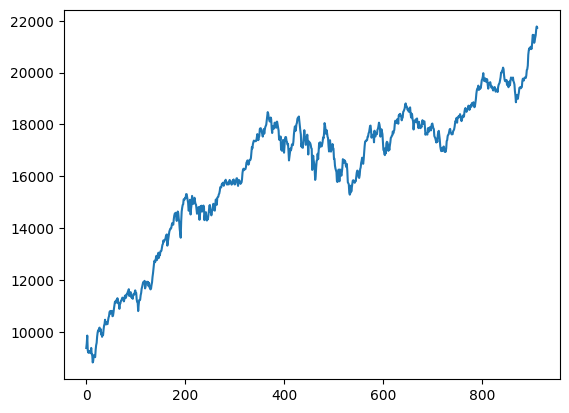

In [3]:
import diagrams as dd
dd.dig(raw1)
original_range=[min(raw1['Close']),max(raw1['Close'])]
print(original_range)

Normalise the Data between 0 to 1, using MinMaxScaler 

In [4]:
# Wont be using this cell as custom defined methods will be used
# raw2=pp.normed_data(raw1)
# dd.dig(raw2)

# # uncomment if running for the first time
# # raw2.to_csv('Nifty_preprocessed', index=False)

Creating a Linear Regression Model
* For benchmarking, on Nifty Preprocessed Data

In [5]:
# Linear Regression
import lin_reg_help as lr
import helperfunc as hf

X_train, X_test, y_train, y_test, y_range = hf.test_train_split_lin_reg(raw1)
lr_model = lr.model(pd.DataFrame(X_train), pd.DataFrame(y_train))

In [6]:
# predict prices
predict_test = lr.predict_index(lr_model, pd.DataFrame(X_test), y_range)
predict_train = lr.predict_index(lr_model, pd.DataFrame(X_train), y_range)
predict_all = lr.predict_index (lr_model, pd.DataFrame(raw1['Days']),y_range)

In [7]:
# scaling actual values
actual_test, _  = hf.scl( y_test, y_range)
actual_train, _ = hf.scl( y_train, y_range)
actual_all, _ =  hf.scl(raw1['Close'], y_range)

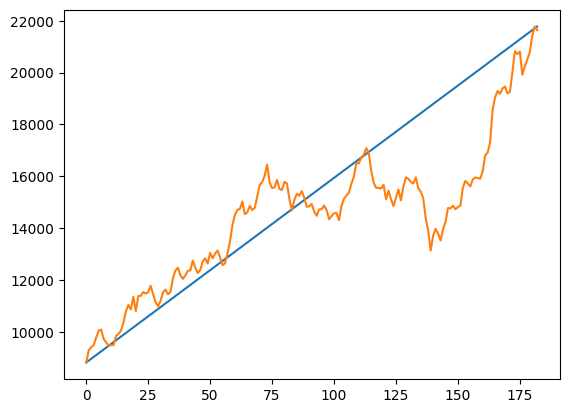

In [8]:
dd.digvs2(predict_test,actual_test, np.arange(len(actual_test)))

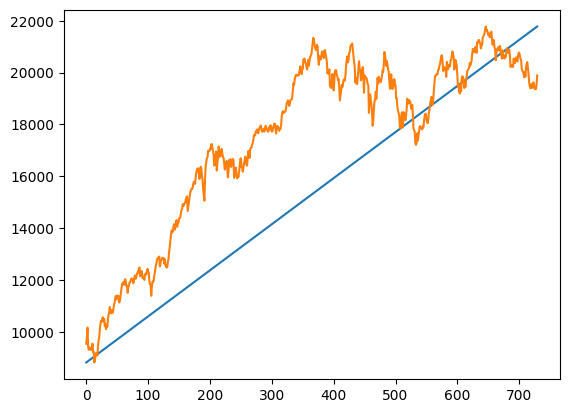

In [9]:
dd.digvs2(predict_train, actual_train, np.arange(len(actual_train)))

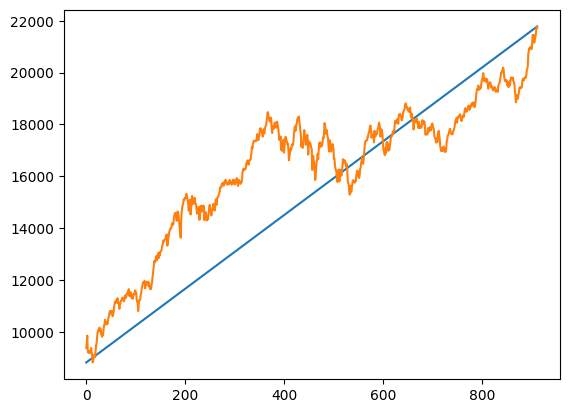

In [10]:
dd.digvs2(predict_all, actual_all, np.arange(len(actual_all)))

Evaluating the model Parameters
- RMSE on training and testing index

In [11]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(actual_train,predict_train)
print(rmse_train)
rmse_test = mean_squared_error(actual_test, predict_test)
print(rmse_test)
rmse_all = mean_squared_error(actual_all, predict_all)

print(rmse_all)

8006937.926474176
4248730.598914596
3773621.859947846


Creating ARIMA model

In [12]:
print(raw_arima.describe())
raw_arima = pp.remove(raw_arima)

X_train_arima, X_test_arima, y_train_arima, y_test_arima = hf.test_train_split_arima(raw_arima)

               Open          High           Low         Close     Adj Close  \
count    913.000000    913.000000    913.000000    913.000000    913.000000   
mean   16252.875686  16328.453490  16149.597510  16244.092890  16244.092890   
std     2829.613365   2827.962558   2831.934412   2830.955691   2830.955691   
min     8889.150391   9030.349609   8806.750000   8823.250000   8823.250000   
25%    14811.849609  14890.250000  14692.450195  14823.150391  14823.150391   
50%    17160.550781  17251.650391  17018.150391  17149.099609  17149.099609   
75%    18094.750000  18141.400391  17992.800781  18070.050781  18070.050781   
max    21737.650391  21801.449219  21678.000000  21778.699219  21778.699219   

             Volume  
count  9.130000e+02  
mean   3.802599e+05  
std    1.916564e+05  
min    0.000000e+00  
25%    2.449000e+05  
50%    2.980000e+05  
75%    5.048000e+05  
max    1.371800e+06  


In [13]:
print(y_train_arima)
import ARIMA_help as ah
ah.check_stationary(y_train_arima)

1800     9380.900391
1801     9553.349609
1802     9859.900391
1803     9293.500000
1804     9205.599609
            ...     
2526    16945.050781
2527    16985.699219
2528    16951.699219
2529    17080.699219
2530    17359.750000
Name: Close, Length: 730, dtype: float64
P Value :  0.16321506544856035
Lags used :  0


In [14]:
# ah.check_stationary((raw_arima['Close']-raw_arima['Close'].shift(1)).dropna())
ah.check_stationary((y_train_arima-y_train_arima.shift(1)).dropna())

P Value :  0.0
Lags used :  0


In [15]:
print(((y_train_arima-y_train_arima.shift(1)).dropna()).reset_index().drop("index", axis=1))
y_start_arima = y_train_arima.iloc[0]
y_train_arima_raw = y_train_arima
y_train_arima = (y_train_arima - y_train_arima.shift(1)).dropna().reset_index().drop("index", axis=1)
print(y_train_arima)


          Close
0    172.449218
1    306.550782
2   -566.400391
3    -87.900391
4     65.300782
..          ...
724 -131.849610
725   40.648438
726  -34.000000
727  129.000000
728  279.050781

[729 rows x 1 columns]
          Close
0    172.449218
1    306.550782
2   -566.400391
3    -87.900391
4     65.300782
..          ...
724 -131.849610
725   40.648438
726  -34.000000
727  129.000000
728  279.050781

[729 rows x 1 columns]


In [16]:
ArimaModel = ah.ARIMA_model(y_train_arima, 30,1,20)
# 1,1,0 for non seasonal data

c:\Users\jabar\miniconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jabar\miniconda3\envs\tf\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\jabar\miniconda3\envs\tf\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print(ArimaModel.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  729
Model:               ARIMA(30, 1, 20)   Log Likelihood               -4696.159
Date:                Wed, 07 Feb 2024   AIC                           9494.318
Time:                        02:24:52   BIC                           9728.424
Sample:                             0   HQIC                          9584.650
                                - 729                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2410      0.917     -1.354      0.176      -3.037       0.556
ar.L2         -0.6812      0.726     -0.939      0.348      -2.104       0.741
ar.L3         -0.7868      0.263     -2.996      0.0

730
183
731   -29.269242
732    35.760193
733    49.279296
734    16.273946
735    28.694583
         ...    
908    -7.443861
909     7.509804
910    26.642505
911    17.350647
912     6.855799
Name: predicted_mean, Length: 182, dtype: float64


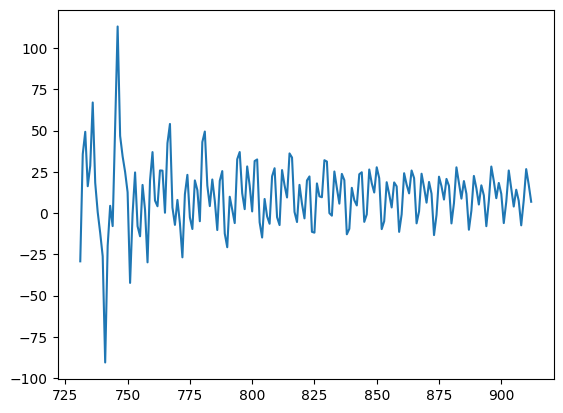

In [18]:
print(len(X_train_arima))
print(len(X_test_arima))

predict_test_arima = ArimaModel.predict(start =len(X_train_arima)+1, end = (len(X_train_arima)+len(X_test_arima)) -1 )
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(predict_test_arima)
print(predict_test_arima)

<class 'numpy.float64'>
<class 'pandas.core.frame.DataFrame'>
183


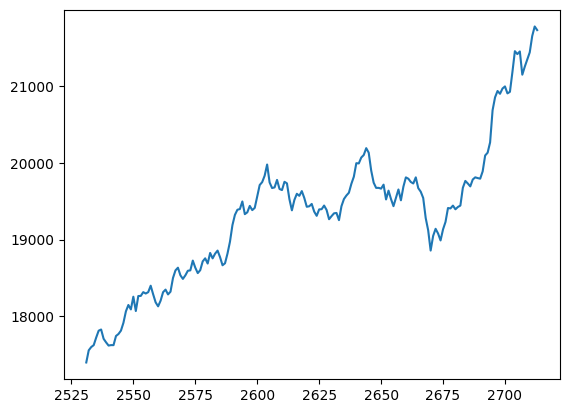

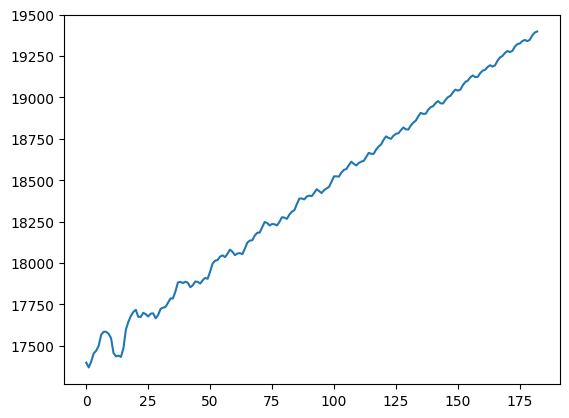

In [19]:
print(type(y_start_arima))
print(type(y_train_arima))


final_test = ah.create_series(y_test_arima.iloc[0], predict_test_arima)

print(len(final_test))
fig, ax= plt.subplots()
ax.plot(y_test_arima)

fig, ax= plt.subplots()
ax.plot(final_test)

183
183
RMSE on test for ARIMA  1111434.5841065408


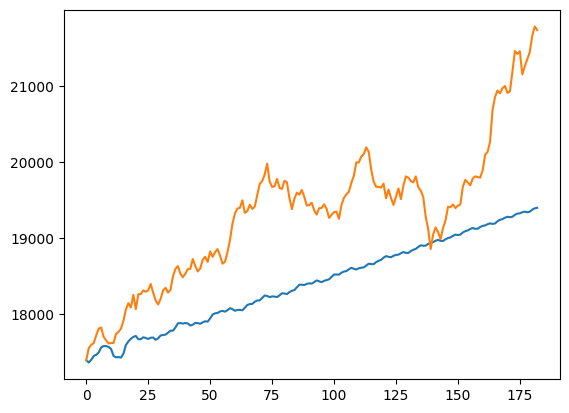

In [20]:
print(len(y_test_arima))
print(len(final_test))

dd.digvs2(final_test, y_test_arima, np.arange(len(final_test)))
print("RMSE on test for ARIMA ", mean_squared_error(final_test, y_test_arima))

In [21]:
# dd.digvs2(y_train_arima, tt, np.arange(len(tt)))
# print(len(y_train_arima_raw))


Creating a LSTM model